In [42]:
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [43]:
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)

In [44]:
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-6)*(28-6), 10)  
        )

    def forward(self, x): 
        return self.model(x)

In [45]:
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss() 

In [50]:
if __name__ == "__main__": 
    for epoch in range(10): # train for 10 epochs
        for batch in dataset: 
            X,y = batch 
            X, y = X.to('cuda'), y.to('cuda') 
            yhat = clf(X) 
            loss = loss_fn(yhat, y) 

            # Apply backprop 
            opt.zero_grad()
            loss.backward() 
            opt.step() 

        print(f"Epoch:{epoch} loss is {loss.item()}")
    
    with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f) 

    with open('model_state.pt', 'rb') as f: 
        clf.load_state_dict(load(f))  

Epoch:0 loss is 0.020957771688699722
Epoch:1 loss is 0.0008636052953079343
Epoch:2 loss is 0.0058151111006736755
Epoch:3 loss is 0.002033083001151681
Epoch:4 loss is 0.0006616867030970752
Epoch:5 loss is 8.228480510297231e-06
Epoch:6 loss is 2.4314276743098162e-05
Epoch:7 loss is 4.082778559677536e-06
Epoch:8 loss is 7.748529924356262e-07
Epoch:9 loss is 8.717061064089648e-07


tensor(9, device='cuda:0')


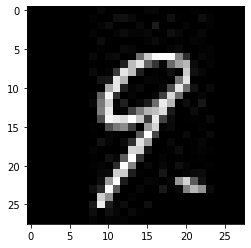

In [52]:
img = Image.open('img_3.jpg') 
plt.imshow(img, cmap = 'gray')
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')
print(torch.argmax(clf(img_tensor)))